In [1]:
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE
import numpy as np
import torch

from classvdd.train import TrainerClasSVDD
from classvdd.test import eval
from preprocess import get_mnist

In [2]:
class Args:
    num_epochs=250
    num_epochs_ae=350
    patience=100
    lr=1e-4
    weight_decay=0.5e-6
    weight_decay_ae=0.5e-3
    lr_ae=1e-4
    lr_milestones_ae=[250]
    lr_milestones=[150]
    batch_size=200
    pretrain=True
    latent_dim=32
    anormal_class=5
    
args = Args()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
dataloader_train, dataloader_val, dataloader_test = get_mnist(args)

classvdd = TrainerClasSVDD(args, dataloader_train, dataloader_val, device)

#if args.pretrain:
#    classvdd.pretrain()

In [3]:
classvdd.train()

43663/43663: [===============================>] - ETA 0.1ss
Training ClasSVDD... Epoch: 0, Loss: 1.265
10916/10916: [===============================>] - ETA 0.1s
Testing ClasSVDD... Epoch: 0, Loss: 0.706
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training ClasSVDD... Epoch: 1, Loss: 0.629
10916/10916: [===============================>] - ETA 0.1s
Testing ClasSVDD... Epoch: 1, Loss: 0.534
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training ClasSVDD... Epoch: 2, Loss: 0.517
10916/10916: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 2, Loss: 0.455
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training ClasSVDD... Epoch: 3, Loss: 0.453
10916/10916: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 3, Loss: 0.403
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training ClasSVDD... Epoch: 4, Loss: 0.407
10916/10916: [=======

10916/10916: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 37, Loss: 0.169
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training ClasSVDD... Epoch: 38, Loss: 0.182
10916/10916: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 38, Loss: 0.168
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training ClasSVDD... Epoch: 39, Loss: 0.181
10916/10916: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 39, Loss: 0.168
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training ClasSVDD... Epoch: 40, Loss: 0.180
10916/10916: [===============================>] - ETA 0.1s
Testing ClasSVDD... Epoch: 40, Loss: 0.168
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training ClasSVDD... Epoch: 41, Loss: 0.179
10916/10916: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 41, Loss: 0.166
Weights saved.

10916/10916: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 75, Loss: 0.15
43663/43663: [===============================>] - ETA 0.1ss
Training ClasSVDD... Epoch: 76, Loss: 0.159
10916/10916: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 76, Loss: 0.148
43663/43663: [===============================>] - ETA 0.1ss
Training ClasSVDD... Epoch: 77, Loss: 0.158
10916/10916: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 77, Loss: 0.147
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training ClasSVDD... Epoch: 78, Loss: 0.157
10916/10916: [===============================>] - ETA 0.1s
Testing ClasSVDD... Epoch: 78, Loss: 0.148
43663/43663: [===============================>] - ETA 0.1ss
Training ClasSVDD... Epoch: 79, Loss: 0.158
10916/10916: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 79, Loss: 0.147
43663/43663: [===============================>] - ETA 0.1ss


43663/43663: [===============================>] - ETA 0.1ss
Training ClasSVDD... Epoch: 114, Loss: 0.148
10916/10916: [===============================>] - ETA 0.1s
Testing ClasSVDD... Epoch: 114, Loss: 0.138
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training ClasSVDD... Epoch: 115, Loss: 0.148
10916/10916: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 115, Loss: 0.139
43663/43663: [===============================>] - ETA 0.1ss
Training ClasSVDD... Epoch: 116, Loss: 0.147
10916/10916: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 116, Loss: 0.139
43663/43663: [===============================>] - ETA 0.1ss
Training ClasSVDD... Epoch: 117, Loss: 0.148
10916/10916: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 117, Loss: 0.137
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training ClasSVDD... Epoch: 118, Loss: 0.147
10916/10916: [===================

10916/10916: [===============================>] - ETA 0.1s
Testing ClasSVDD... Epoch: 152, Loss: 0.132
43663/43663: [===============================>] - ETA 0.1ss
Training ClasSVDD... Epoch: 153, Loss: 0.140
10916/10916: [===============================>] - ETA 0.1s
Testing ClasSVDD... Epoch: 153, Loss: 0.132
43663/43663: [===============================>] - ETA 0.1ss
Training ClasSVDD... Epoch: 154, Loss: 0.140
10916/10916: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 154, Loss: 0.132
43663/43663: [===============================>] - ETA 0.1ss
Training ClasSVDD... Epoch: 155, Loss: 0.140
10916/10916: [===============================>] - ETA 0.1s
Testing ClasSVDD... Epoch: 155, Loss: 0.132
Weights saved.
43663/43663: [===============================>] - ETA 0.1ss
Training ClasSVDD... Epoch: 156, Loss: 0.140
10916/10916: [===============================>] - ETA 0.1s
Testing ClasSVDD... Epoch: 156, Loss: 0.133
43663/43663: [===============================>] - 

10916/10916: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 191, Loss: 0.132
43663/43663: [===============================>] - ETA 0.1ss
Training ClasSVDD... Epoch: 192, Loss: 0.139
10916/10916: [===============================>] - ETA 0.1s
Testing ClasSVDD... Epoch: 192, Loss: 0.132
43663/43663: [===============================>] - ETA 0.1ss
Training ClasSVDD... Epoch: 193, Loss: 0.140
10916/10916: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 193, Loss: 0.132
43663/43663: [===============================>] - ETA 0.1ss
Training ClasSVDD... Epoch: 194, Loss: 0.140
10916/10916: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 194, Loss: 0.132
43663/43663: [===============================>] - ETA 0.1ss
Training ClasSVDD... Epoch: 195, Loss: 0.139
10916/10916: [===============================>] - ETA 0.1s
Testing ClasSVDD... Epoch: 195, Loss: 0.132
43663/43663: [===============================>] - ETA 0.1ss
Train

10916/10916: [===============================>] - ETA 0.1s
Testing ClasSVDD... Epoch: 230, Loss: 0.131
43663/43663: [===============================>] - ETA 0.1ss
Training ClasSVDD... Epoch: 231, Loss: 0.139
10916/10916: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 231, Loss: 0.132
43663/43663: [===============================>] - ETA 0.1ss
Training ClasSVDD... Epoch: 232, Loss: 0.139
10916/10916: [===============================>] - ETA 0.1s
Testing ClasSVDD... Epoch: 232, Loss: 0.132
43663/43663: [===============================>] - ETA 0.1ss
Training ClasSVDD... Epoch: 233, Loss: 0.139
10916/10916: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 233, Loss: 0.131
43663/43663: [===============================>] - ETA 0.1ss
Training ClasSVDD... Epoch: 234, Loss: 0.139
10916/10916: [===============================>] - ETA 0.1s
Testing ClasSVDD... Epoch: 234, Loss: 0.132
43663/43663: [===============================>] - ETA 0.1ss
Train

In [9]:
state_dict = torch.load('classvdd/weights/model_parameters_5.pth')
classvdd.net.load_state_dict(state_dict['model'])
classvdd.c = torch.Tensor(state_dict['center']).to(device)

In [10]:
import torch

from sklearn.metrics import roc_auc_score

def eval(net, c, dataloader, device):
    """Testing the Deep SVDD model"""

    scores = []
    labels1 = []
    labels2 = []
    net.eval()
    print('Testing...')
    with torch.no_grad():
        for x, y1, y2 in dataloader:
            x = x.float().to(device)            
            z = net(x)
            score = torch.min(torch.sum((z.unsqueeze(1) - c) ** 2, dim=2),dim=1)[0]
            
            scores.append(score.detach().cpu())
            labels1.append(y1.cpu())
            labels2.append(y2.cpu())
    labels1, labels2, scores = torch.cat(labels1).numpy(), torch.cat(labels2).numpy(), torch.cat(scores).numpy()
    print('ROC AUC score: {:.3f}'.format(roc_auc_score(labels2, scores)))
    return labels1, labels2, scores

In [11]:
labels1, labels2, scores = eval(classvdd.net, classvdd.c, dataloader_test, device)

Testing...
ROC AUC score: 0.939


In [12]:
scores_in = scores[labels2==0]
scores_out = scores[labels2==1]

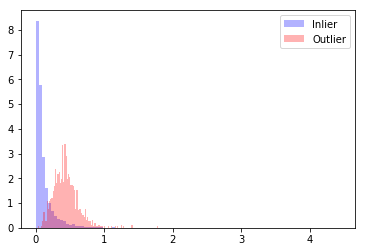

In [13]:
plt.hist(scores_in, bins=100, color='b', alpha=0.3, density=True, label='Inlier')
plt.hist(scores_out, bins=100, color='r', alpha=0.3, density=True, label='Outlier')
plt.legend()